

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [3]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo, beginDate)
startdate = str(beginDate)[1:-1]



#hard code option
startdate = "'2016-12-09'"

['2016-12-18'] ['2016-12-17'] ['2016-12-12'] ['2016-12-17']


### get url

In [11]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/7xfp-iv9k.csv' // trees
url = 'https://data.sfgov.org/resource/7xfp-iv9k.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'  // graffiti
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/7xfp-iv9k.csv?$where=opened>='2016-12-09'


In [12]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [13]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [15]:
df = pd.read_csv(url)

In [16]:
df.shape

(189, 16)

#### wow, 5 days > 1000 reports

In [17]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6638585,12/17/2016 08:51:38 PM,NaN,12/17/2016 08:51:38 PM,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,Other,"555 40TH AVE, SAN FRANCISCO, CA, 94121",1.0,NaN,"(37.778243152, -122.501054054)",Open311,NaN
1,6638180,12/17/2016 04:09:47 PM,NaN,12/17/2016 04:09:47 PM,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Damaged_vandalism,"211 ARKANSAS ST, SAN FRANCISCO, CA, 94107",10.0,Potrero Hill,"(37.763598830238, -122.398428836462)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5855d3c53da153f1b6e7f281/report.jpg
2,6637873,12/17/2016 02:19:31 PM,NaN,12/17/2016 02:21:14 PM,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Fallen_tree,Intersection of 2ND ST and TEHAMA ST,6.0,South of Market,"(37.7863385950627, -122.397704566464)",Voice In,NaN


In [18]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [19]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6638585,2016-12-17 20:51:38,NaT,2016-12-17 20:51:38,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Tree_Other,Other,"555 40TH AVE, SAN FRANCISCO, CA, 94121",1.0,NaN,"(37.778243152, -122.501054054)",Open311,NaN
1,6638180,2016-12-17 16:09:47,NaT,2016-12-17 16:09:47,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Damaged_vandalism,"211 ARKANSAS ST, SAN FRANCISCO, CA, 94107",10.0,Potrero Hill,"(37.763598830238, -122.398428836462)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5855d3c53da153f1b6e7f281/report.jpg
2,6637873,2016-12-17 14:19:31,NaT,2016-12-17 14:21:14,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Fallen_tree,Intersection of 2ND ST and TEHAMA ST,6.0,South of Market,"(37.7863385950627, -122.397704566464)",Voice In,NaN


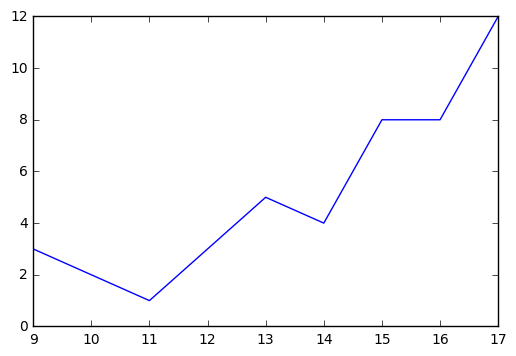

In [20]:
df.Closed.dt.day.value_counts().sort_index().plot()

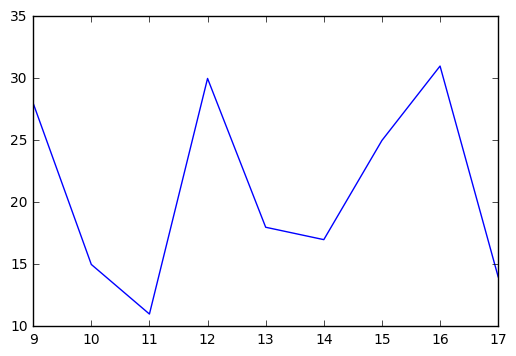

In [21]:
df.Opened.dt.day.value_counts().sort_index().plot()

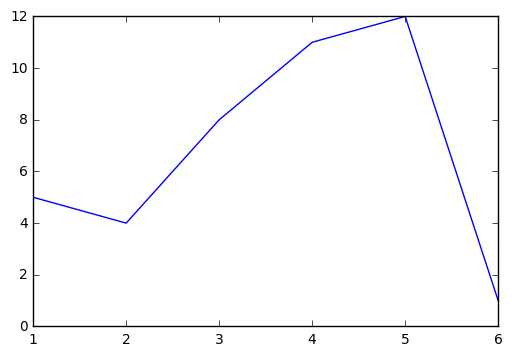

In [22]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [23]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [24]:

df['Request Details'].value_counts()


Other                                   46
Fallen_tree                             35
Damaged_vandalism                       33
Pruning_request                         22
Hanging_limb                            10
About_to_fall                            9
Blocking_signs                           7
Near_communication_line                  4
Hitting_window_or_building               4
Restake_tree                             3
Other_enter_additional_details_below     3
Lifted_sidewalk_tree_roots               2
Blocking_sidewalk                        2
Blocking_street_lights                   2
Dead_tree                                2
Weeding                                  1
Property_damage                          1
Empty_tree_basin                         1
Sewer_damage_tree_roots                  1
Shrubbery_blocking_visibility            1
Name: Request Details, dtype: int64

In [25]:
df['Supervisor District'].value_counts().sort_index()



-1.0      1
 1.0     13
 2.0     13
 3.0     16
 4.0      3
 5.0     15
 6.0     13
 7.0     20
 8.0     25
 9.0     24
 10.0    14
 11.0    31
Name: Supervisor District, dtype: int64

In [26]:
df.Neighborhood.value_counts()

Cayuga                     16
Mission                    15
South of Market             6
Mission Dolores             5
Downtown / Union Square     5
Financial District          4
Inner Richmond              4
Bayview                     4
Outer Richmond              4
Outer Sunset                3
Golden Gate Park            3
Tenderloin                  3
Inner Sunset                3
Sunnyside                   3
Noe Valley                  3
Pacific Heights             3
Castro                      3
Glen Park                   3
Potrero Hill                3
Lower Haight                3
Ashbury Heights             2
Forest Hill                 2
Fairmount                   2
Lakeshore                   2
Presidio Heights            2
Dolores Heights             2
North Beach                 2
Lower Nob Hill              2
Peralta Heights             2
Panhandle                   2
                           ..
Stonestown                  2
Holly Park                  2
Merced Hei

In [27]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
7,6637390,2016-12-17 11:13:30,NaT,2016-12-17 11:13:30,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Damaged_vandalism,"8 SAN CARLOS ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.762499324207, -122.420323239761)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58558e553da153f1b6e7e9d0/photo_20161217_111253.jpg
35,6634241,2016-12-16 10:07:05,NaT,2016-12-16 10:25:06,Open,open,DPW BUF Queue,Tree Maintenance,Trees - Landscaping,Shrubbery_blocking_visibility,Intersection of HORACE ST and 25TH ST,9.0,Mission,"(37.7508685263238, -122.414490007799)",Voice In,NaN
38,6634193,2016-12-16 09:57:11,NaT,2016-12-16 09:59:42,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,About_to_fall,"2966 FOLSOM ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.749879180352, -122.414029710012)",Voice In,NaN
42,6633652,2016-12-16 07:58:51,NaT,2016-12-16 09:25:58,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Hanging_limb,"2239 BRYANT ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.758581559367, -122.409532732667)",Voice In,NaN
96,6623542,2016-12-13 10:29:01,NaT,2016-12-13 10:29:01,Open,open,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,Intersection of 18TH ST and CAPP ST,9.0,Mission,"(37.7619015858826, -122.418271439265)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58503de33da19793c74ce8ac/photo_20161213_102836.jpg
97,6623459,2016-12-13 10:16:29,NaT,2016-12-13 11:27:24,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,"1096 TREAT AVE, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752647054459, -122.413071338511)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58503af23da19793c74ce775/photo_20161213_101613.jpg
98,6623438,2016-12-13 10:13:44,NaT,2016-12-13 11:27:19,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,"3049 24TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752429274045, -122.413238981762)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58503a4a3da19793c74ce70f/photo_20161213_101307.jpg
99,6623399,2016-12-13 10:08:31,NaT,2016-12-13 11:14:18,Open,open,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,"3122 24TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752585078288, -122.414595528776)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585039153da19793c74ce668/photo_20161213_100807.jpg
100,6623312,2016-12-13 09:56:53,NaT,2016-12-13 09:56:53,Open,open,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,Intersection of 24TH ST and LILAC ST,9.0,Mission,"(37.7522712511524, -122.417876793921)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5850365b3da19793c74ce4f1/photo_20161213_095624.jpg
138,6616803,2016-12-11 12:47:16,NaT,2016-12-11 12:47:16,Open,accepted,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Other,"2761 16TH ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.765312317273, -122.414434026033)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584dbb4d3da19793c74c9ae8/photo_20161211_124700.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [28]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [40]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
Name: Media URL, dtype: object


In [41]:
print(peskin[:])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
Name: Media URL, dtype: object


# The whole City

In [42]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5855d3c53da153f1b6e7f281/report.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585592303da153f1b6e7ea62/report.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/58558e553da153f1b6e7e9d0/photo_20161217_111253.jpg
3     http://mobile311.sfgov.org/media/san_francisco/report/photos/585581f63da153f1b6e7e79b/photo_20161217_102015.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585574fc3da153f1b6e7e5d6/report.jpg
5             http://mobile311.sfgov.org/media/san_francisco/report/photos/585574453da153f1b6e7e59f/1481995257453.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58548a0a3da153f1b6e7de06/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5854525f3da153f1b6e7d80f/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [32]:
len(images)

62

In [33]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/5855d3c53da153f1b6e7f281/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/58503de33da19793c74ce8ac/photo_20161213_102836.jpg


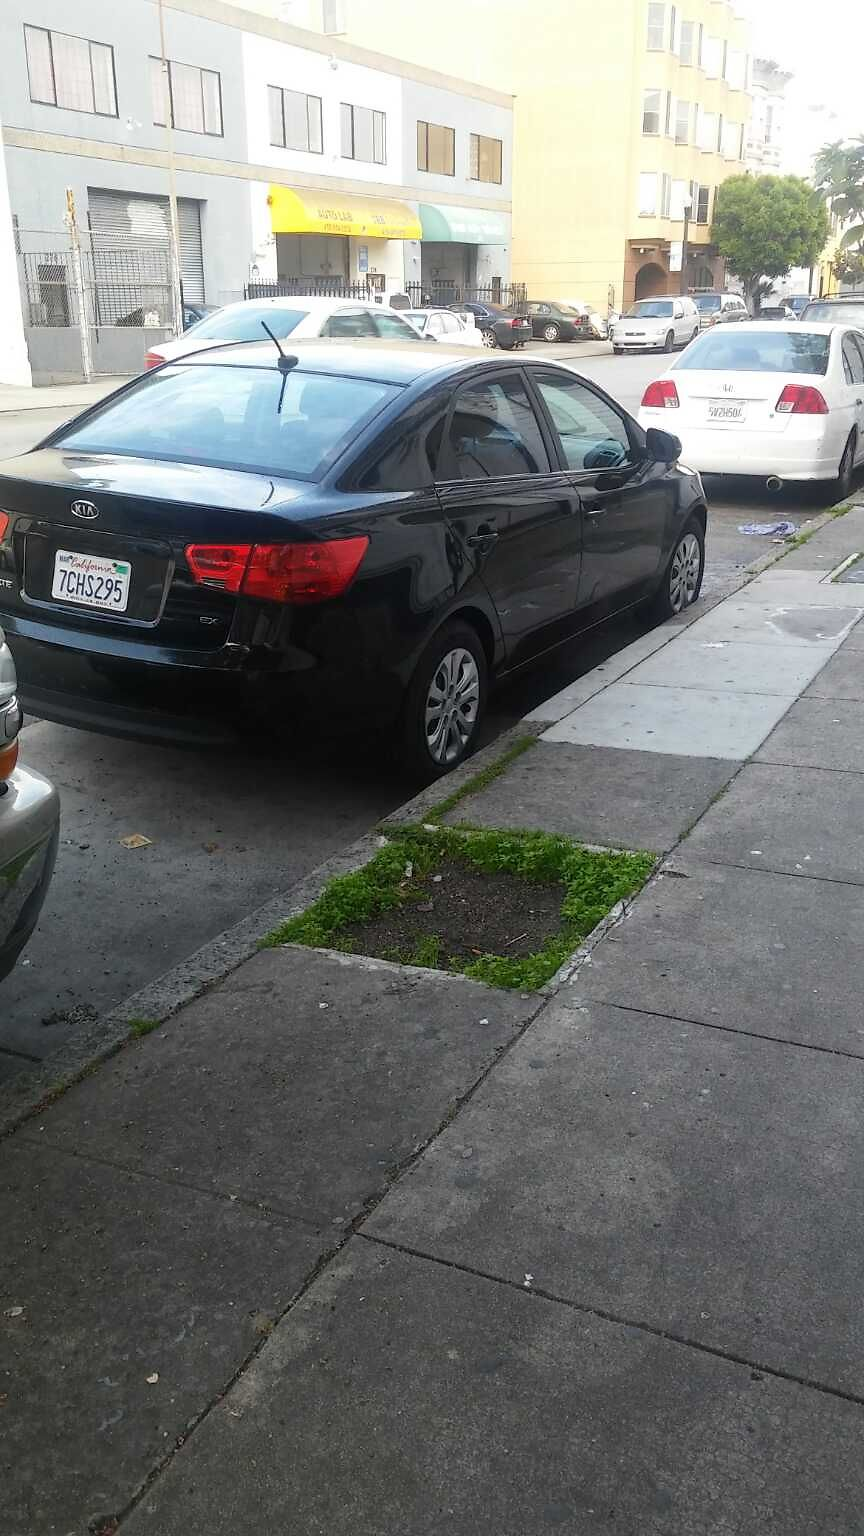

In [34]:
print(images[20])
Image(images[20])


In [35]:
!pwd

/home/gdillon/JupyterPractice/trees_SF311/ipynb


In [43]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [44]:
!yes| bash ./ipynb/vidCreate.sh

bash: ./ipynb/vidCreate.sh: No such file or directory
yes: standard output: Broken pipe


In [28]:
'''
Had problems with this code, running standalone

%cd assets/
!wget -i ../imagelist.txt

!sleep 30
#%ls | gawk 'BEGIN{ a=1 }{ printf "mv \"%s\" %04d.jpg\n", $0, a++ }' | bash
#!sleep 10
#!convert -delay 50 *.jpg out.mp4
%cd ..
'''

'\nHad problems with this code, running standalone\n\n%cd assets/\n!wget -i ../imagelist.txt\n\n!sleep 30\n#%ls | gawk \'BEGIN{ a=1 }{ printf "mv "%s" %04d.jpg\n", $0, a++ }\' | bash\n#!sleep 10\n#!convert -delay 50 *.jpg out.mp4\n%cd ..\n'

In [29]:
#!convert -delay 50 *.jpg out.mp4


In [54]:
!ls -la


total 15904
drwxrwxr-x 5 gdillon gdillon     4096 Dec 13 14:24 .
drwxrwxr-x 8 gdillon gdillon     4096 Dec 13 10:41 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 12 20:08 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 12 21:21 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon    98418 Dec 12 19:54 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 13 13:48 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec  9 10:22 San+Francisco+Graffiti with Video.ipynb
drwxrwxr-x 2 gdillon gdillon    36864 Dec 10 22:21 assets
-rw-rw-r-- 1 gdillon gdillon     3712 Dec 13 14:23 imagelist.txt
drwxrwxr-x 2 gdillon gdillon    12288 Dec 13 14:23 input
-rw-rw-r-- 1 gdillon gdillon      168 Dec  9 16:49 pipevid.sh
-rw-rw-r-- 1 gdillon gdillon   430884 Dec 13 14:24 sfOneDay.ipynb
-rw-rw-r-- 1 gdillon gdillon      223 Dec 11 00:00 vidCreate.sh
-rw-rw-r-- 1 gdillon gdillon 14110852 Dec 13 14:23 video.gif
-rw-rw-r-- 1 gdillon gdillon   693865 Dec 10 

In [31]:
Image('report2.jpg')